<div style="border:solid black 2px; padding: 20px"><h1 style="color:black; margin-bottom:20px">Reviewer's comment v1</h1>
Halo Juliman !

Perkenalkan saya Dipta, disini saya akan mereview tugas Juliman ya.

Saya akan memberikan beberapa komen seperti dibawah ini, tolong jangan dipindah, dirubah, maupun dihapus ya.

Komen yang saya berikan akan muncul dalam warna hijau, kuning, atau pun merah seperti ini:

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

<div class="alert alert-warning">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Terdapat beberapa catatan.

</div>

<div class="alert alert-danger">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Perlu beberapa perbaikan

</div>

Dan tentu saja Juliman dapat menjawab saya dengan menggunakan ini

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik kak
</div>

# 1 Deskripsi Proyek
Operator seluler Megaline merasa tidak puas karena banyak pelanggan mereka yang
masih menggunakan paket lama. Perusahaan tersebut ingin mengembangkan sebuah
model yang dapat menganalisis perilaku konsumen dan merekomendasikan salah satu
dari kedua paket terbaru Megaline: Smart atau Ultra. Ambang batas untuk tingkat accuracy yang diharapkan adalah 0.75.

## Instruksi Proyek
* Buka dan cermati file data secara teliti. File path: /datasets/users_behavior.csv. Unduh dataset
* Pisahkan data sumber menjadi training set, validation set, dan test set.
* Periksa kualitas model yang berbeda dengan mengubah hyperparameter-nya. Jelaskan secara singkat temuan-temuan yang Anda dapatkan dari penelitian ini.
* Periksa kualitas model dengan menggunakan test set.
* Tugas tambahan: lakukan sanity check terhadap model. Data ini lebih kompleks daripada data yang pernah Anda kerjakan sebelumnya, jadi ini memang bukanlah tugas yang mudah. Kita akan mempelajarinya lebih jauh nanti.

## Deskripsi Data
Setiap observasi dalam dataset memuat informasi perilaku bulanan untuk setiap pengguna. Adapun informasi tersebut mencakup:
* `сalls` — jumlah panggilan
* `minutes` — total durasi panggilan dalam satuan menit
* `messages` — jumlah pesan teks
* `mb_used` — traffic penggunaan internet dalam satuan MB
* `is_ultimate` — paket untuk bulan yang sedang berjalan (Ultimate - 1, Surf - 0)

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

# 2 Tujuan Proyek
Tujuan proyek ini adalah mengembangkan sebuah model yang dapat menganalisis perilaku konsumen dan merekomendasikan salah satu dari kedua paket terbaru Megaline: Smart atau Ultra.

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

# 3 Import Library

In [173]:
# Library Data Prep
import pandas as pd, numpy as np

# Library Data Viz
import matplotlib.pyplot as plt, seaborn as sns


# sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Ignore warning
import warnings
pd.set_option('display.max_column', 100)
warnings.filterwarnings('ignore')

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

# 4 Ikhtisar Data

In [174]:
# Load data
data = pd.read_csv('/content/users_behavior.csv')

In [175]:
# Menampilkan sampel data
data.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [176]:
# Menampilkan informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [177]:
# Memeriksa nilai yang hilang
data.isna().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

In [178]:
# Menampilkan nilai statistik data
data.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


Kesimpulan :
* Penamaan kolom sudah tepat
* Tipe data sudah sesuai
* Tidak ada nilai yang hilang
* Target adalah `is_ultra` dan feature adalah `calls`, `minutes`, `messages` dan `mb_used`.
* Nilai target berupa binary pada kolom `is_ultra` yang memiliki nilai berikut:
  * 1 yang merupakan paket ultra
  * 0 yang merupakan paket smart

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

# 5 Pra-pemrosesan data

In [179]:
# Memeriksa duplikat
data.duplicated().sum()

0

Tidak ada nilai duplikat

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

# 6 Analisis Data Exploratif

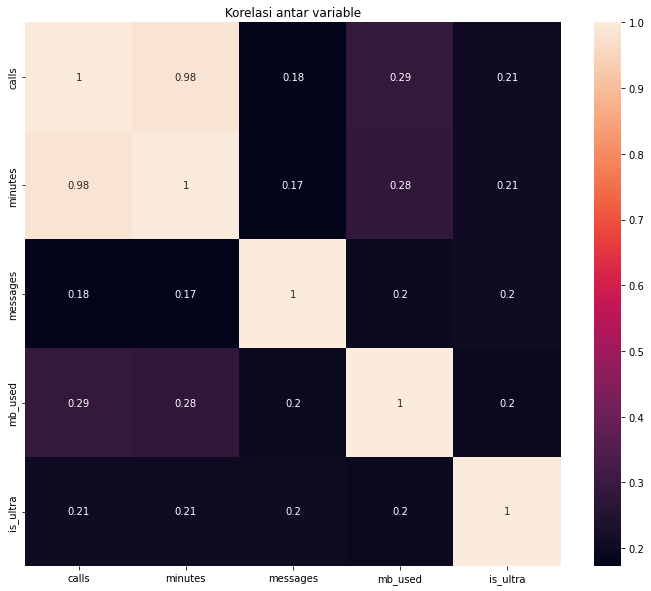

In [180]:
# Korelasi antar data
plt.figure(figsize=(12, 10))
plt.title('Korelasi antar variable')
sns.heatmap(data[['calls', 'minutes', 'messages', 'mb_used', 'is_ultra']].corr(), annot=True)
plt.show()

Dari grafik terlihat bahwa semua korelasi positif. Korelasi relatif rendah dibawah 0.3 kecuali korelasi antara minutes dan calls yang bernilai 0.98. Korelasi ini sangat besar sehingga kedua variabel ini dapat dianggap identik. Pada dasarnya sumber variabel ini adalah panggilan, hanya saja minutes untuk durasi dan calls untuk jumlah panggilan. Untuk itu kita ambil salah satu yakni calls sebagai feature. Sedangkan variabel yang lain dengan korelasi yang sangat rendah bersifat unik sehingga dapat disertakan dalam pembuatan model.

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

# 7 Feature Engineering

In [181]:
# Menentukan feature
feature = data.drop(['minutes','is_ultra'], axis=1)
feature.head()

,calls,messages,mb_used
0,40.0,83.0,19915.42
1,85.0,56.0,22696.96
2,77.0,86.0,21060.45
3,106.0,81.0,8437.39
4,66.0,1.0,14502.75


In [182]:
# Menentukan target
target = data['is_ultra']
target.head()

0    0
1    0
2    0
3    1
4    0
Name: is_ultra, dtype: int64

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

# 8 Memisahkan Data

Dataset dibagi 80% data training dan 20% testing. 

In [183]:
# Membagi Training dan Testing
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size = 0.2, random_state = 12345)

Dataset telah dibagi menjadi training dan testing, selanjutnya training dibagi lagi untuk mendapatkan 20% validation data.

In [184]:
# Membagi data training dengan data validation
feature_train, feature_valid, target_train, target_valid = train_test_split(feature_train, target_train, test_size = 0.25, random_state = 12345)

In [185]:
# Menentukan nama dataset yang telah dibuat
feature_train.name = 'Feature_Train'
target_train.name = 'Target_Train'
feature_test.name = 'Feature_Test'
target_test.name = 'Target_Test'
feature_valid.name = 'Feature_Valid'
target_valid.name = 'Target_Valid'

In [186]:
# Menampilkan ukuran data yang sudah dibagi
for dataset in [feature_train, target_train, feature_test, target_test, feature_valid, target_valid]:
  print('Besar dari', dataset.name, ':', np.round(dataset.shape[0]/len(data)*100),'%')

Besar dari Feature_Train : 60.0 %
Besar dari Target_Train : 60.0 %
Besar dari Feature_Test : 20.0 %
Besar dari Target_Test : 20.0 %
Besar dari Feature_Valid : 20.0 %
Besar dari Target_Valid : 20.0 %


Dataset Feature dan Target telah dibagi menjadi 3 :
* 60 % untuk data training
* 20 % untuk data test, dan
* 20 % untuk data validation 

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

# 9 Memeriksa Kualitas Model dengan Hyperparameter

Bagian ini membangun dan memeriksa kualitas model dengan menggunakan :
* Logistic Regression
* Decision Tree Classifier
* Random Forest

## 9.1 Logistic Regression
Membangun model logistik regression dengan menggunakan `liblinear` pada `solver` sebagai hyperparameter. `liblinear` cocok untuk model klasifikasi.
(https://medium.com/@data.science.enthusiast/logistic-regression-tune-hyperparameters-python-code-fintech-does-it-bring-any-value-619e172565e6)

In [187]:
# Membuat fungsi membangun dan memeriksa logistic regression model
def logistic_regression(x_train, y_train, x_valid, y_valid):
    model = LogisticRegression(random_state=12345, solver='liblinear') # Membuat model
    model.fit(x_train, y_train) # Melatih model 
    model.score(x_train, y_train) # Memeriksa akurasi
    train_predictions = model.predict(x_train) # prediksi dengan data train
    predictions_valid = model.predict(x_valid) # prediksi dengan data validation
    print("Train accuracy:", accuracy_score(y_train, train_predictions),"|","Valid accuracy :",accuracy_score(y_valid, predictions_valid))
logistic_regression(feature_train, target_train, feature_valid, target_valid)

Train accuracy: 0.7007261410788381 | Valid accuracy : 0.6998444790046656


Akurasi untuk train dan validation dibawah 75% (batas akurasi yang diharapkan) yakni 70% dan 69%. Dengan demikian model ini tidak dapat digunakan.

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## 9.2 Decision Tree Classifier
Membuat Model Decision Tree Classifier dengan `max_depth` sebagai hyperparameter

max_depth = 1 : Train accuracy: 0.758298755186722 | Valid accuracy : 0.7387247278382582
max_depth = 2 : Train accuracy: 0.7894190871369294 | Valid accuracy : 0.7589424572317263
max_depth = 3 : Train accuracy: 0.8101659751037344 | Valid accuracy : 0.7651632970451011
max_depth = 4 : Train accuracy: 0.8179460580912863 | Valid accuracy : 0.7620528771384136
max_depth = 5 : Train accuracy: 0.8257261410788381 | Valid accuracy : 0.76049766718507
max_depth = 6 : Train accuracy: 0.8360995850622407 | Valid accuracy : 0.7573872472783826
max_depth = 7 : Train accuracy: 0.8475103734439834 | Valid accuracy : 0.7573872472783826
max_depth = 8 : Train accuracy: 0.8651452282157677 | Valid accuracy : 0.7682737169517885
max_depth = 9 : Train accuracy: 0.8770746887966805 | Valid accuracy : 0.7620528771384136
max_depth = 10 : Train accuracy: 0.8905601659751037 | Valid accuracy : 0.7729393468118196
max_depth = 11 : Train accuracy: 0.904045643153527 | Valid accuracy : 0.7667185069984448
max_depth = 12 : Train 

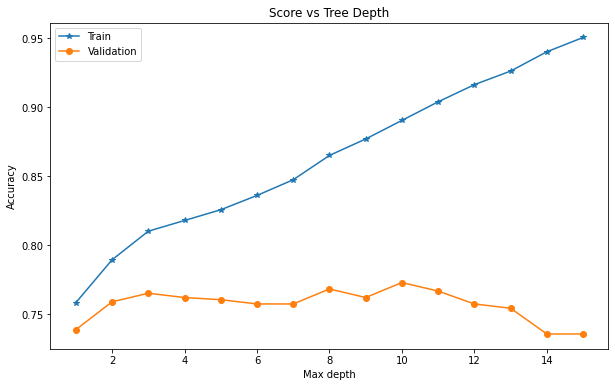

In [188]:
# Membuat fungsi membangun dan memeriksa decision tree classifier model
def decision_tree_classifier(x_train, y_train, x_valid, y_valid):
    # Membuat list untuk menampung skor
    train_scores = []
    valid_scores = []
    # Menentukan kedalaman tree
    tree_depth = [i for i in range(1, 16)]
    # Membuat loop untuk max_depth
    for depth in tree_depth:
        model = DecisionTreeClassifier(random_state=12345, max_depth = depth) # Membuat model
        model.fit(x_train, y_train) # Melatih model
        # membuat prediksi untuk train
        train_predictions = model.predict(x_train)
        train_predictions_acc = accuracy_score(y_train, train_predictions)
        train_scores.append(train_predictions_acc)
        # membuat prediksi untuk validation
        predictions_valid = model.predict(x_valid)
        predictions_valid_acc = accuracy_score(y_valid, predictions_valid)
        valid_scores.append(predictions_valid_acc)
        print("max_depth =", depth, ": ", end='')
        print("Train accuracy:",train_predictions_acc,"|","Valid accuracy :",predictions_valid_acc)
    # Membuat grafik/plot antara skor dan kedalaman tree
    plt.figure(figsize=(10,6))
    plt.plot(tree_depth, train_scores, '-*', label='Train')
    plt.plot(tree_depth, valid_scores, '-o', label='Validation')
    plt.title('Score vs Tree Depth')
    plt.xlabel('Max depth')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
decision_tree_classifier(feature_train, target_train, feature_valid, target_valid)

Dari 1 sampai 20 kedalaman (max_depth), max_depth yang ke-4 adalah yang paling bagus untuk train dan validation, dengan akurasi masing-masing 81% dan 76%. Selisih akurasi antara traing dan validation 5%, sehingga model ini dapat digunakan.

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## 9.3 Random Forest Classifier
Membuat model dengan random forest classifier dengan n_estimators sebagai hyperparameter.

n_estimator = 1 : Train accuracy: 0.9118257261410788  |  Valid accuracy :  0.7309486780715396
n_estimator = 2 : Train accuracy: 0.9144190871369294  |  Valid accuracy :  0.7589424572317263
n_estimator = 3 : Train accuracy: 0.9553941908713693  |  Valid accuracy :  0.7620528771384136
n_estimator = 4 : Train accuracy: 0.9522821576763485  |  Valid accuracy :  0.776049766718507
n_estimator = 5 : Train accuracy: 0.9725103734439834  |  Valid accuracy :  0.7651632970451011
n_estimator = 6 : Train accuracy: 0.9647302904564315  |  Valid accuracy :  0.776049766718507
n_estimator = 7 : Train accuracy: 0.979253112033195  |  Valid accuracy :  0.7822706065318819
n_estimator = 8 : Train accuracy: 0.9745850622406639  |  Valid accuracy :  0.7962674961119751
n_estimator = 9 : Train accuracy: 0.9839211618257261  |  Valid accuracy :  0.7916018662519441
n_estimator = 10 : Train accuracy: 0.9813278008298755  |  Valid accuracy :  0.7931570762052877


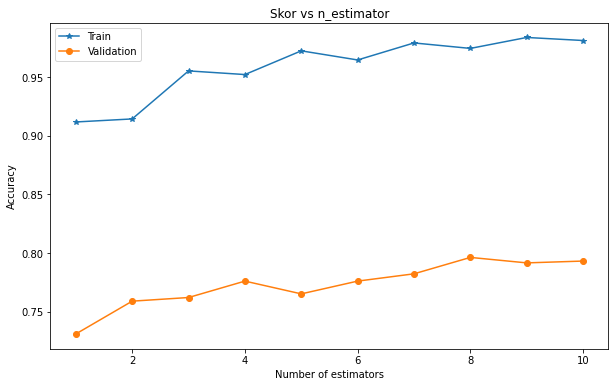

In [189]:
# create the random forest classifier model
def random_forest_classifier(x_train, y_train, x_valid, y_valid):
    # Membuat list untuk menampung skor
    train_scores = []
    valid_scores = []
    # Menentukan range n_estimator
    estimator_depth = [i for i in range(1, 11)]
    # Membuat loop untuk n_estimator
    for est in estimator_depth:
        model = RandomForestClassifier(random_state=12345, n_estimators=est)
        model.fit(x_train, y_train) # Melatih model
        # membuat prediksi untuk train
        train_predictions = model.predict(x_train)
        train_predictions_acc = accuracy_score(y_train, train_predictions)
        train_scores.append(train_predictions_acc)
        # membuat prediksi untuk validation
        predictions_valid = model.predict(x_valid)
        predictions_valid_acc = accuracy_score(y_valid, predictions_valid)
        valid_scores.append(predictions_valid_acc)
        print("n_estimator =", est, ": ", end='')
        print("Train accuracy:",train_predictions_acc," | ","Valid accuracy : ",predictions_valid_acc)
    # Membuat grafik/plot antarascores dan n_estimator
    plt.figure(figsize=(10,6))
    plt.plot(estimator_depth, train_scores, '-*', label='Train')
    plt.plot(estimator_depth, valid_scores, '-o', label='Validation')
    plt.title('Skor vs n_estimator')
    plt.xlabel('Number of estimators')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    # print the fn and the plot random forest classifier
random_forest_classifier(feature_train, target_train, feature_valid, target_valid)

Akurasi yang paling baik ada pada n_estimator ke-10, dengan nilai akurasi pada train dan validation masing-masing 98% dan 79%. Namun selisih antara train dan validation hampir mendekati 20%.

<div class="alert alert-warning">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

- selain n_estimator, bisa dilakukan tuning hyperparams max_depth juga

</div>

# 10 Memeriksa Kualitas Model dengan Test Set

Dari ketiga model diatas, Decission Tree Classifier yang paling baik sebagai model untuk itu kita akan melakukan pemeriksaan kualitas dengan test set pada model ini.

In [190]:
# Test set dengan Decision Tree Classifier
model = DecisionTreeClassifier(random_state=12345, max_depth = 4) # Membuat model
model.fit(feature_train, target_train) # Melatih model
test_predictions = model.predict(feature_test)# membuat prediksi untuk train
accuracy_score(target_test, test_predictions) # Menghitung Akurasi Test

0.7900466562986003

Akurasi Test set 79% telah melewati batas akurasi minimum.

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

# 11 Sanity Check
Sanity check sudah dilakukan dengan accuracy_score, dibagian ini sanity check akan dilakukan dengan confusion_matrix.

In [191]:
# Sanity check pada model dengan confusion_matrix
model = DecisionTreeClassifier(random_state=12345, max_depth = 4) # Membuat model
model.fit(feature_train, target_train) # Melatih model
valid_predictions = model.predict(feature_valid) # membuat prediksi untuk validation
confusion_matrix(target_valid, valid_predictions) # sanity check dengan confusion_matrix

array([[416,  27],
       [126,  74]])

Dari hasil sanitasi check terlihat bahwa:
* Di baris 0 ada 443, tetapi hanya 416 yang dialokasikan dengan benar ke 0 dan 27 salah ditetapkan ke 1. 
* Di baris 1 ada 200, tetapi hanya 74 yang dialokasikan dengan benar ke 1 dan 126 yang salah dibagi ke 0.

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

# 12 Kesimpulan

Tujuan proyek ini adalah mengembangkan sebuah model yang dapat menganalisis perilaku konsumen dan merekomendasikan salah satu dari kedua paket terbaru Megaline: Smart atau Ultra.

Berikut ini kesimpulan berdasarkan langkah-langkah yang telah diambil:
1. Pada dasarnya data sudah bersih, tidak ada nilai hilang, tipe data sudah sesuai, tidak ada duplikat dan siap untuk di proses.
2. Dari analisis data eksploratif ditemukan bahwa korelasi antara variable minutes dan calls sangat tinggi yakni 0.98 sehingga dapat dipilih salah satu. Sedangkan variable lainnya bersifat unik sehingga dapat disertakan dalam feature.
3. Data dipisahakan menjadi Train, Valid dan Test dengan proporsi masing-masing 60%, 20%, dan 20%.
4. Model dibuat dengan menggunakan 3 cara yaitu logistic regression, decision tree classifier, dan random forest.
5. Dari hasil pemeriksaan model ditemukan bahwa decision tree classifier memiliki hasil yang paling baik dengan akurasi pada train 81% dan validation 76%. Hasil tersebut didapat dengan menggunakan `max_depth` sebagai hyperparameter dengan kedalaman ke-4.
6. Ketika melakukan pemeriksaan kualitas model dengan test set didapatkan akurasi 79%.
7. Sanity check mengambarkan bagaimana prediksi yang benar pada validation set.


Secara umum model yang telah dibangun sudah melewati akurasi 75% yang diharapkan. Model ini sudah dapat memprediksi paket yang tepat untuk konsumen dengan benar sebanyak 79%.

<div class="alert alert-block alert-success">

# General comments #1
<b>Reviewer's comment</b> <a class="tocSkip"></a> 

Good Job Juliman! Sebagian besar kamu telah menyelesaikan project ini dengan baik dan tanpa revisi yah!
    

</div>